
### **ARPU Analysis / Business KPIs**

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#loading validated dataset -- data/processed/validated_df.csv
df = pd.read_csv("../data/processed/validated_df.csv")

#### **1. Basic ARPU by churn**

ARPU = mean(MonthlyCharges) across Churn = Yes and Churn = No.

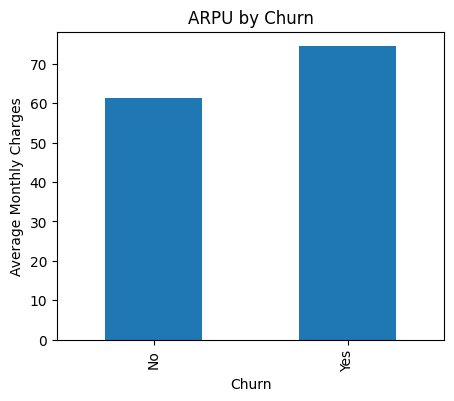

In [3]:
# Grouping by Churn value to calculate average Monthly Charges for each group
# APRU = Average Revenue Per User
plt.figure(figsize=(5,4))
df.groupby("Churn")["MonthlyCharges"].mean().plot(kind='bar')
plt.ylabel("Average Monthly Charges")
plt.title("ARPU by Churn")
plt.show()

- Customers paying higher monthly charges are more likely to churn.
- Losing high-paying customers has a bigger impact on revenue.

#### **2. ARPU by Tenure Group**
Analysising the ARPU based on the tenures such as:
- 0–12 months
- 13–36 months
- 37–60 months
- 60+ months

C:\Users\Rix\AppData\Local\Temp\ipykernel_3448\3772269416.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  arpu_by_tenure_churn = df.groupby(['tenure_group', 'Churn'])['MonthlyCharges'].mean().unstack()


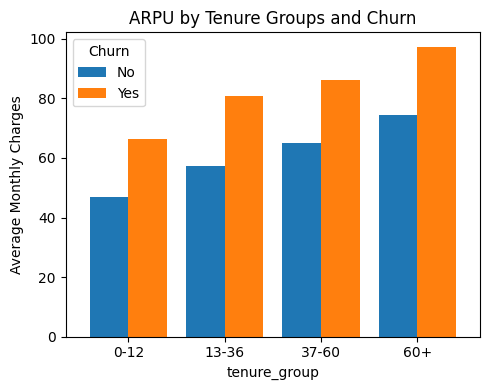

In [4]:
# Tenure group bins
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0,12,36,60,100],
    labels=['0-12', '13-36', '37-60','60+']
)

# Group by tenure group and Churn
arpu_by_tenure_churn = df.groupby(['tenure_group', 'Churn'])['MonthlyCharges'].mean().unstack()

# Plot grouped bar chart
arpu_by_tenure_churn.plot(
    kind='bar',
    figsize=(5,4),
    width=0.8  # adjust bar width if needed
)
plt.ylabel("Average Monthly Charges")
plt.title("ARPU by Tenure Groups and Churn")
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

**Key Insights: ARPU by Tenure Groups**
- Churners have higher ARPU than non-churners in every tenure group.
- In 60+ months: churners ≈ 100, non-churners ≈ 75.
- In 0–12 months: churners ≈ 65, non-churners ≈ 48.

#### **3. ARPU by Internet Service Type**

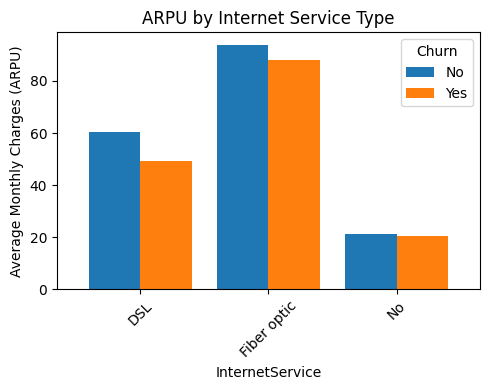

In [5]:
# Group by Internet Service and Churn
arpu_by_internet = df.groupby(['InternetService', 'Churn'])['MonthlyCharges'].mean().unstack()

# Plot grouped bar chart
arpu_by_internet.plot(
    kind='bar',
    figsize=(5,4),
    width=0.8  # adjust width if needed
)
plt.ylabel("Average Monthly Charges (ARPU)")
plt.title("ARPU by Internet Service Type")
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

- Fiber Optic: Highest-paying customers with the highest churn, likely due to service quality issues rather than price.
- DSL: Medium-paying customers who churn mainly because of price sensitivity or switching to faster options.
- No Internet Service: Lowest-paying customers whose churn has minimal revenue impact and is driven by basic dissatisfaction.

#### **4. ARPU by Contract Type**



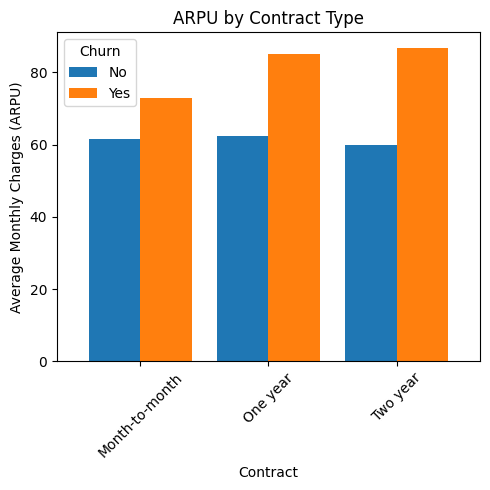

In [7]:
# Group by Contract and Churn
arpu_by_contract = df.groupby(['Contract', 'Churn'])['MonthlyCharges'].mean().unstack()

# Plot grouped bar chart
arpu_by_contract.plot(
    kind='bar',
    figsize=(5,5),
    width=0.8  # adjust width if needed
)
plt.ylabel("Average Monthly Charges (ARPU)")
plt.title("ARPU by Contract Type")
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

- Month-to-month churners have higher ARPU (≈73) than non-churners (≈62), suggesting high-paying users switch quickly when unhappy.
- One-year and two-year churners show the highest ARPU (85–87), while non-churners are around 60.

#### **5. ARPU by Payment Method**

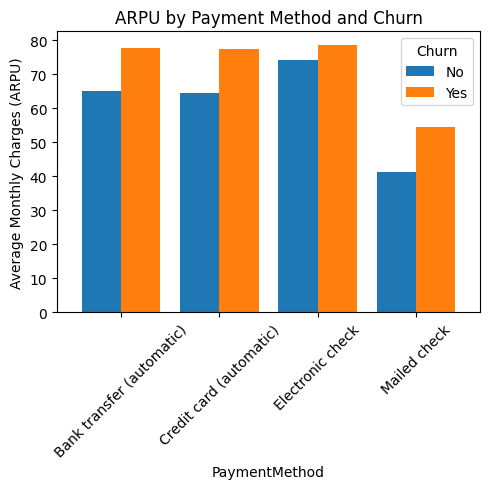

In [9]:
# Group by Payment Method and Churn
arpu_by_payment_churn = df.groupby(['PaymentMethod', 'Churn'])['MonthlyCharges'].mean().unstack()

# Plot grouped bar chart
arpu_by_payment_churn.plot(
    kind='bar',
    figsize=(5,5),
    width=0.8  # adjust bar width if needed
)
plt.ylabel("Average Monthly Charges (ARPU)")
plt.title("ARPU by Payment Method and Churn")
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

- High-ARPU customers using Electronic Check, Bank Transfer, or Credit Card churn the most.
- Electronic Check users have the highest ARPU and still leave.
- Even auto-pay users churn, showing strong dissatisfaction.
- Mailed Check users have low ARPU, and their churn impact is small.